<a href="https://colab.research.google.com/github/sofianna-e/DeliveriesEKPA/blob/main/CyberThreatHunting_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2382743637.py:43: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort = True)


Random forest: Accuracy on training Data: 1.000
Random forest: Accuracy on test Data: 1.000
Random Forest: Precision on test data: 0.974
Random Forest: Recall on test data: 0.765
Random Forest: F1-score on test data: 0.857

Comparison of Classifiers:
        ML Model  Train Accuracy  Test Accuracy
0  Random Forest             1.0       0.999561


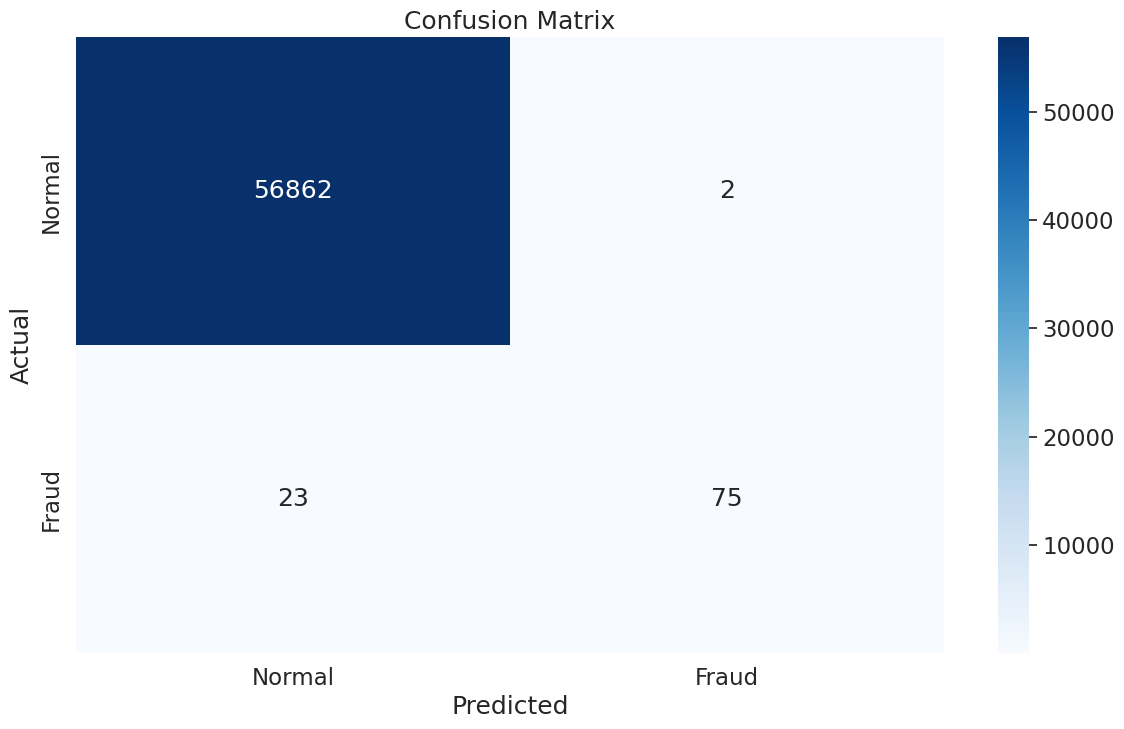

In [11]:

# φόρτωση βιβλιοθηκών
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline

# έλεγχος κατανομής κλάσεων
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

# φόρτωση συνόλου δεδομένων
url = "https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv"
data = pd.read_csv(url)

# διαγραφή κενών ή μη αριθμητικών τιμών
data = data.select_dtypes(include=['float64', 'int64']).dropna()

# διαχωρισμός ανεξάρτητων και εξαρτημένων μεταβλητών
X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# διαχωρισμός συνόλου δεδομένων σε σύνολο εκπαίδευσης και δοκιμών

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# κατανομή της εξαρτημένης μεταβλητής (class)
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

# δημιουργία Random Forest αλγορίθμου
classifier = RandomForestClassifier(random_state=42)

# εκπαίδευση αλγόριθμου
classifier.fit(X_train, y_train)

# πρόβλεψη συνόλου δοκιμής
y_test_forest = classifier.predict(X_test)
y_train_forest = classifier.predict(X_train)


# υπολογισμός μετρικών αξιολόγησης (accuracy, precision, recall, f-score, confusion matrix)

acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

results = pd.DataFrame({
    'ML Model': ['Random Forest'],
    'Train Accuracy': [acc_train_forest],
    'Test Accuracy': [acc_test_forest]
})

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

precision_forest = precision_score(y_test, y_test_forest)
recall_forest = recall_score(y_test, y_test_forest)
f1_forest = f1_score(y_test, y_test_forest)

print("Random Forest: Precision on test data: {:.3f}".format(precision_forest))
print("Random Forest: Recall on test data: {:.3f}".format(recall_forest))
print("Random Forest: F1-score on test data: {:.3f}".format(f1_forest))

cm = confusion_matrix(y_test, y_test_forest)

results_df = results.sort_values(by='Test Accuracy', ascending=False)

print("\nComparison of Classifiers:")
print(results_df)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=LABELS, yticklabels=LABELS)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()